In [1]:
#1.首先引入numpy，由于测试中用到了pandas和matplotlib，所以这里一并加载
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#2.定义一个均值函数

#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(dataX):
    return np.mean(dataX, axis=0) #axis=0表示按照列来求均值，如果输入list,则axis=1

In [3]:
#3.编写pca方法，具体解释参考注释

"""
参数：
    - XMat：传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
    - k：表示取前k个特征值对应的特征向量
返回值：
    - finalData：参数一指的是返回的低维矩阵，对应于输入参数二
    - reconData：参数二对应的是移动坐标轴后的矩阵
"""
def pca(XMat, k):
    average = meanX(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T) #计算协方差矩阵
    featValue, featVec = np.linalg.eig(covX) #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue) #按照featValue进行从大到小排序
    finalData = []
    if k > n:
        print("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里需要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  
    return finalData, reconData

In [4]:
#4.编写一个加载数据集的函数

#输入文件的每行数据都以\t隔开
def loaddata(datafile):
    return np.array(pd.read_csv(datafile, sep="\t", header=-1)).astype(np.float)

In [5]:
#5.可视化结果

#因为我将维数k指定为2，所以可以使用下面的函数将其绘制出来：
def plotBestFit(data1, data2):    
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)

    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i, 0])
        axis_y1.append(dataArr1[i, 1])
        axis_x2.append(dataArr2[i, 0]) 
        axis_y2.append(dataArr2[i, 1])                 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1'); plt.ylabel('x2');
    plt.savefig("outfile.png")
    plt.show()

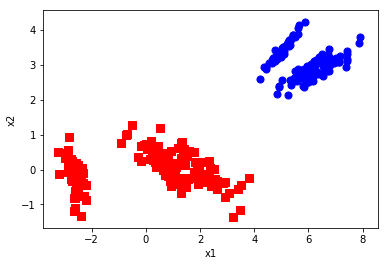

In [11]:
#6.测试方法

#测试方法写入main函数中，然后直接执行main方法即可：
#data.txt可到github中下载：data.txt

#根据数据集data.txt
def main():    
    datafile = "./PCA.csv"
    XMat = loaddata(datafile)
    k = 2
    return pca(XMat, k)
if __name__ == "__main__":
    finalData, reconMat = main()
    plotBestFit(finalData, reconMat)